In [2]:
import xarray as xr
import numpy as np
import cmocean.cm as cm
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr

In [3]:
import salishsea_tools.river_202108 as rivers

In [4]:
jetty_mask = xr.open_dataset('jetty_mask_bathy202108.nc')
# jetty_mask

In [5]:
nav_lon = jetty_mask.nav_lon.to_numpy()
nav_lat = jetty_mask.nav_lat.to_numpy()
nav_lon.shape

(898, 398)

In [27]:
jetty_mask.bfr_coef_u

<xarray.DataArray 'bfr_coef_u' (y: 898, x: 398)>
[357404 values with dtype=float64]
Dimensions without coordinates: y, x
Attributes:
    units:      none
    long_name:  friction_x_binary_mask

In [28]:
# jetty_mask.bfr_coef_u.to_numpy().shape
blank = np.zeros((898, 398, 39))

In [29]:
# river = xr.open_dataset('/home/sallen/MEOPAR/tools/I_ForcingFiles/Rivers/ncfiles/R202108Dailies_y2017m09d29.nc')
# freshwater_bool = river.rorunoff.to_numpy() != 0
# freshwater_all = freshwater_bool[0]*13

In [30]:
with_rivers = np.copy(blank)

In [31]:
wshed_list = list(rivers.prop_dict.keys())
for wshed in wshed_list:
    riv_list = rivers.prop_dict[wshed].keys()
    for riv in riv_list:
        i = rivers.prop_dict[wshed][riv]['i']
        di = rivers.prop_dict[wshed][riv]['di']
        j = rivers.prop_dict[wshed][riv]['j']
        dj = rivers.prop_dict[wshed][riv]['dj']
        depth = rivers.prop_dict[wshed][riv]['depth']

        with_rivers[rivers.prop_dict[wshed][riv]['i']:rivers.prop_dict[wshed][riv]['i']+rivers.prop_dict[wshed][riv]['di'], rivers.prop_dict[wshed][riv]['j']:rivers.prop_dict[wshed][riv]['j']+rivers.prop_dict[wshed][riv]['dj'], 0:rivers.prop_dict[wshed][riv]['depth']] = 13

In [32]:
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish

with_rivers[rivers.prop_dict['fraser']['Nooksack']['i']:rivers.prop_dict['fraser']['Nooksack']['i']+rivers.prop_dict['fraser']['Nooksack']['di'], rivers.prop_dict['fraser']['Nooksack']['j']:rivers.prop_dict['fraser']['Nooksack']['j']+rivers.prop_dict['fraser']['Nooksack']['dj'], 0:rivers.prop_dict['fraser']['Nooksack']['depth']] = 1
with_rivers[rivers.prop_dict['skagit']['Skagit1']['i']:rivers.prop_dict['skagit']['Skagit1']['i']+rivers.prop_dict['skagit']['Skagit1']['di'], rivers.prop_dict['skagit']['Skagit1']['j']:rivers.prop_dict['skagit']['Skagit1']['j']+rivers.prop_dict['skagit']['Skagit1']['dj'], 0:rivers.prop_dict['skagit']['Skagit1']['depth']] = 2
with_rivers[rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['i']:rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['i']+rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['di'], rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['j']:rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['j']+rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['dj'], 0:rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['depth']] = 3
with_rivers[rivers.prop_dict['puget']['NisquallyMcAllister']['i']:rivers.prop_dict['puget']['NisquallyMcAllister']['i']+rivers.prop_dict['puget']['NisquallyMcAllister']['di'], rivers.prop_dict['puget']['NisquallyMcAllister']['j']:rivers.prop_dict['puget']['NisquallyMcAllister']['j']+rivers.prop_dict['puget']['NisquallyMcAllister']['dj'], 0:rivers.prop_dict['puget']['NisquallyMcAllister']['depth']] = 4
with_rivers[rivers.prop_dict['jdf']['Elwha']['i']:rivers.prop_dict['jdf']['Elwha']['i']+rivers.prop_dict['jdf']['Elwha']['di'], rivers.prop_dict['jdf']['Elwha']['j']:rivers.prop_dict['jdf']['Elwha']['j']+rivers.prop_dict['jdf']['Elwha']['dj'], 0:rivers.prop_dict['jdf']['Elwha']['depth']] = 5
with_rivers[rivers.prop_dict['evi_s']['Cowichan1']['i']:rivers.prop_dict['evi_s']['Cowichan1']['i']+rivers.prop_dict['evi_s']['Cowichan1']['di'], rivers.prop_dict['evi_s']['Cowichan1']['j']:rivers.prop_dict['evi_s']['Cowichan1']['j']+rivers.prop_dict['evi_s']['Cowichan1']['dj'], 0:rivers.prop_dict['evi_s']['Cowichan1']['depth']] = 6
with_rivers[rivers.prop_dict['evi_s']['Nanaimo1']['i']:rivers.prop_dict['evi_s']['Nanaimo1']['i']+rivers.prop_dict['evi_s']['Nanaimo1']['di'], rivers.prop_dict['evi_s']['Nanaimo1']['j']:rivers.prop_dict['evi_s']['Nanaimo1']['j']+rivers.prop_dict['evi_s']['Nanaimo1']['dj'], 0:rivers.prop_dict['evi_s']['Nanaimo1']['depth']] = 7
with_rivers[rivers.prop_dict['evi_s']['Puntledge']['i']:rivers.prop_dict['evi_s']['Puntledge']['i']+rivers.prop_dict['evi_s']['Puntledge']['di'], rivers.prop_dict['evi_s']['Puntledge']['j']:rivers.prop_dict['evi_s']['Puntledge']['j']+rivers.prop_dict['evi_s']['Puntledge']['dj'], 0:rivers.prop_dict['evi_s']['Puntledge']['depth']] = 8
with_rivers[rivers.prop_dict['evi_n']['SalmonSayward']['i']:rivers.prop_dict['evi_n']['SalmonSayward']['i']+rivers.prop_dict['evi_n']['SalmonSayward']['di'], rivers.prop_dict['evi_n']['SalmonSayward']['j']:rivers.prop_dict['evi_n']['SalmonSayward']['j']+rivers.prop_dict['evi_n']['SalmonSayward']['dj'], 0:rivers.prop_dict['evi_n']['SalmonSayward']['depth']] = 9
with_rivers[rivers.prop_dict['bute']['Homathko']['i']:rivers.prop_dict['bute']['Homathko']['i']+rivers.prop_dict['bute']['Homathko']['di'], rivers.prop_dict['bute']['Homathko']['j']:rivers.prop_dict['bute']['Homathko']['j']+rivers.prop_dict['bute']['Homathko']['dj'], 0:rivers.prop_dict['bute']['Homathko']['depth']] = 10
with_rivers[rivers.prop_dict['howe']['Squamish']['i']:rivers.prop_dict['howe']['Squamish']['i']+rivers.prop_dict['howe']['Squamish']['di'], rivers.prop_dict['howe']['Squamish']['j']:rivers.prop_dict['howe']['Squamish']['j']+rivers.prop_dict['howe']['Squamish']['dj'], 0:rivers.prop_dict['howe']['Squamish']['depth']] = 11
with_rivers[rivers.prop_dict['fraser']['Fraser']['i']:rivers.prop_dict['fraser']['Fraser']['i']+rivers.prop_dict['fraser']['Fraser']['di'], rivers.prop_dict['fraser']['Fraser']['j']:rivers.prop_dict['fraser']['Fraser']['j']+rivers.prop_dict['fraser']['Fraser']['dj'], 0:rivers.prop_dict['fraser']['Fraser']['depth']] = 12

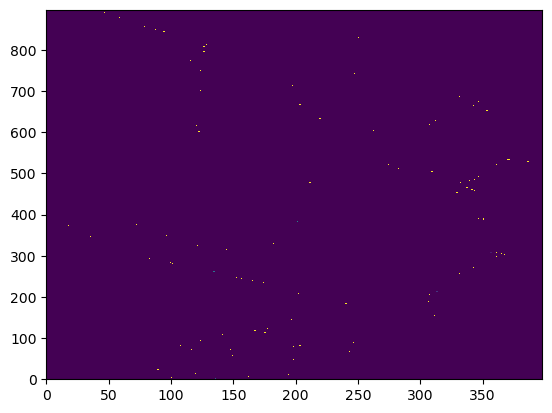

In [53]:
plt.pcolormesh(with_rivers[:,:,0])

In [94]:
notebook = 'make_dye_mask.ipynb'
coords = {
    'x' : range(398),
    'y' : range(898),
    'depth' : range(39),
}
var_attrs = {'units': '1',
                    'long_name': 'fw_tag'}

filename = "river_mask_3D_bathy202108.nc"

netcdf_title = f'Rivers tags'
ds_attrs = {
        'acknowledgements':
            'Created for dye tracers',
        'creator_email':
            'cdonaldson@eoas.ubc.ca',
        'creator_name':
            'Salish Sea MEOPAR Project Contributors',
        'creator_url':
            'https://salishsea-meopar-docs.readthedocs.org/',
        'institution':
            'UBC EOAS',
        'institution_fullname': (
            'Earth, Ocean & Atmospheric Sciences,'
            ' University of British Columbia'
        ),
        'title': netcdf_title,
        'notebook': notebook,
        # 'rivers_base': prop_dict_name,
        'summary': f'River Tags for Bathymetry 202108',
        'history': (
            '[{}] File creation.'
            .format(dt.datetime.today().strftime('%Y-%m-%d'))
        )
        }

da = xr.DataArray(
        data = with_rivers,
        name='freshwater',
        dims=('y', 'x','depth'),
        coords = coords,
        attrs = var_attrs)

var_attrs = {'units': 'degrees',
                    'long_name': 'longitude'}

lon = xr.DataArray(
    data = nav_lon,
    name ='nav_lon',
    dims=('y', 'x'),
    coords={
    'x' : range(398),
    'y' : range(898),},
    attrs=var_attrs
)

var_attrs = {'units': 'degrees',
                    'long_name': 'latitude'}

lat = xr.DataArray(
    data = nav_lat,
    name ='nav_lat',
    dims=('y', 'x'),
    coords={
    'x' : range(398),
    'y' : range(898),},
    attrs=var_attrs
)


ds = xr.Dataset(
        data_vars={
        'freshwater': da, 'nav_lon': lon, 'nav_lat': lat},
        coords = coords,
        attrs = ds_attrs
    )

encoding = {var: {'zlib': True} for var in ds.data_vars}

ds.to_netcdf(filename, encoding=encoding,)

In [ ]:
def write_file(day, runoff, config):
    "3D dye mask with 12 rivers numbered 1 to 12 and the rest as 13"
    notebook = 'make_dye_mask.ipynb'
    coords = {
        'x' : range(398),
        'y' : range(898),
        'time_counter' : [0],
    }
    var_attrs = {'units': 'kg m-2 s-1',
                      'long_name': 'runoff_flux'}
    
    # set up filename 
    directory = Path(config["rivers"]["rivers dir"])
    filename_tmpls = config["rivers"]["file templates"][bathy_type]
        
    filename = directory / filename_tmpls.format(day.date())
    print (filename)
        
    netcdf_title = f'Rivers for {day.date()}'
    ds_attrs = {
        'acknowledgements':
            'Based on river fit',
        'creator_email':
            'sallen@eoas.ubc.ca',
        'creator_name':
            'Salish Sea MEOPAR Project Contributors',
        'creator_url':
            'https://salishsea-meopar-docs.readthedocs.org/',
        'institution':
            'UBC EOAS',
        'institution_fullname': (
            'Earth, Ocean & Atmospheric Sciences,'
            ' University of British Columbia'
        ),
        'title': netcdf_title,
        'notebook': notebook,
        'rivers_base': prop_dict_name,
        'summary': f'Daily Runoff for Bathymetry 202108',
        'history': (
            '[{}] File creation.'
            .format(dt.datetime.today().strftime('%Y-%m-%d'))
        )
        }
    runoffs = np.empty((1, runoff.shape[0], runoff.shape[1]))
    runoffs[0] = runoff

    da = xr.DataArray(
            data = runoffs,
            name='rorunoff',
            dims=('time_counter', 'y', 'x'),
            coords = coords,
            attrs = var_attrs)
    

    ds = xr.Dataset(
            data_vars={
            'rorunoff': da},
            coords = coords,
            attrs = ds_attrs
        )
    
    encoding = {var: {'zlib': True} for var in ds.data_vars}

    ds.to_netcdf(filename, unlimited_dims=('time_counter'),
            encoding=encoding,)

In [ ]:
# data_xr = xr.DataArray(with_rivers, coords={'y': jetty_mask.nav_lat,'x': jetty_mask.nav_lon}, dims=["y", "x"])

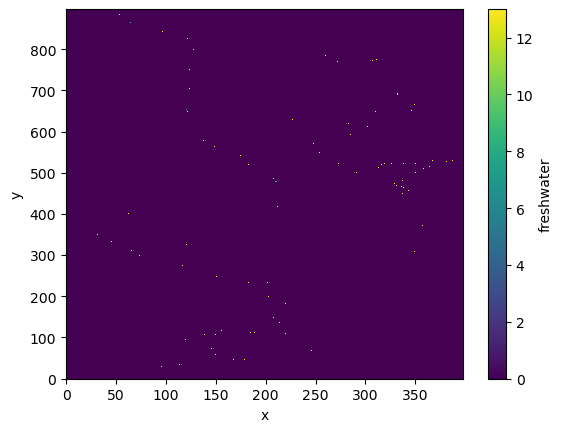

In [ ]:
river_mask = jetty_mask.drop_vars(('bfr_coef_u', 'bfr_coef_v'))
river_mask = river_mask.assign(freshwater=(['y', 'x'], with_rivers))
river_mask['freshwater'].plot()

In [ ]:
# river_mask.to_netcdf('river_mask_bathy202108.nc')

In [ ]:
river_mask

<xarray.Dataset>
Dimensions:     (y: 898, x: 398)
Dimensions without coordinates: y, x
Data variables:
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
    freshwater  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    Conventions:  CF-1.6
    title:        Jetty Mask for Bathy 202108
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       bathymetry/Process202108Bathymetry.ipynb
    references:   grid/jetty_mask_bathy202108.nc
    history:      [2021-08-06 10:32:12] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetry

In [91]:
xr.open_dataset('jetty_mask_bathy202108.nc')

<xarray.Dataset>
Dimensions:     (y: 898, x: 398)
Dimensions without coordinates: y, x
Data variables:
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
    bfr_coef_u  (y, x) float64 ...
    bfr_coef_v  (y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Jetty Mask for Bathy 202108
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       bathymetry/Process202108Bathymetry.ipynb
    references:   grid/jetty_mask_bathy202108.nc
    history:      [2021-08-06 10:32:12] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetry

In [92]:
ds

<xarray.Dataset>
Dimensions:     (x: 398, y: 898, depth: 39)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * y           (y) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * depth       (depth) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38
Data variables:
    freshwater  (y, x, depth) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon     (y, x) float64 -123.4 -123.4 -123.4 ... -124.4 -124.3 -124.3
    nav_lat     (y, x) float64 46.86 46.86 46.86 46.87 ... 51.1 51.1 51.1 51.1
Attributes:
    acknowledgements:      Created for dye tracers
    creator_email:         cdonaldson@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers tags
    notebook:              make_dye_mask.ipynb
    summary:               River Tags for Bathymetry 202108
    history:               [2023-07-25] File creation.

In [86]:
xr.open_dataset('river_mask_bathy202108.nc').nav_lon

<xarray.DataArray 'nav_lon' (y: 898, x: 398)>
[357404 values with dtype=float64]
Dimensions without coordinates: y, x
Attributes:
    units:      degrees_east
    long_name:  longitude

In [95]:
xr.open_dataset('river_mask_3D_bathy202108.nc')

<xarray.Dataset>
Dimensions:     (x: 398, y: 898, depth: 39)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * y           (y) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * depth       (depth) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38
Data variables:
    freshwater  (y, x, depth) float64 ...
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
Attributes:
    acknowledgements:      Created for dye tracers
    creator_email:         cdonaldson@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers tags
    notebook:              make_dye_mask.ipynb
    summary:               River Tags for Bathymetry 202108
    history:               [2023-07-25] File creation.

: 

In [89]:
xr.open_dataset('.nfs000000003e2f000400000c18')

<xarray.Dataset>
Dimensions:     (x: 398, y: 898, depth: 39)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * y           (y) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * depth       (depth) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38
Data variables:
    freshwater  (y, x, depth) float64 ...
Attributes:
    acknowledgements:      Created for dye tracers
    creator_email:         cdonaldson@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers tags
    notebook:              make_dye_mask.ipynb
    summary:               River Tags for Bathymetry 202108
    history:               [2023-07-25] File creation.